In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import cross_val_predict, KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix



In [ ]:

data = pd.read_excel('/content/chronic_kidney_disease.xlsx')


X = data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = data['class']

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

Random Forest 5-Fold Cross-Validation Results:
Random Forest Accuracy: 1.0
Random Forest Sensitivity: 1.0
Random Forest Precision: 1.0
Random Forest Confusion Matrix:
[[115   0]
 [  0  43]]
Random Forest Elapsed Time: 0.7666494846343994
Decision Tree 5-Fold Cross-Validation Results:
Decision Tree Accuracy: 0.9810126582278481
Decision Tree Sensitivity: 0.9810126582278481
Decision Tree Precision: 0.9814953872559538
Decision Tree Confusion Matrix:
[[115   0]
 [  3  40]]
Decision Tree Elapsed Time: 0.03739523887634277
KNN 5-Fold Cross-Validation Results:
KNN Accuracy: 0.8291139240506329
KNN Sensitivity: 0.8291139240506329
KNN Precision: 0.8344445948690178
KNN Confusion Matrix:
[[112   3]
 [ 24  19]]
KNN Elapsed Time: 0.08511686325073242


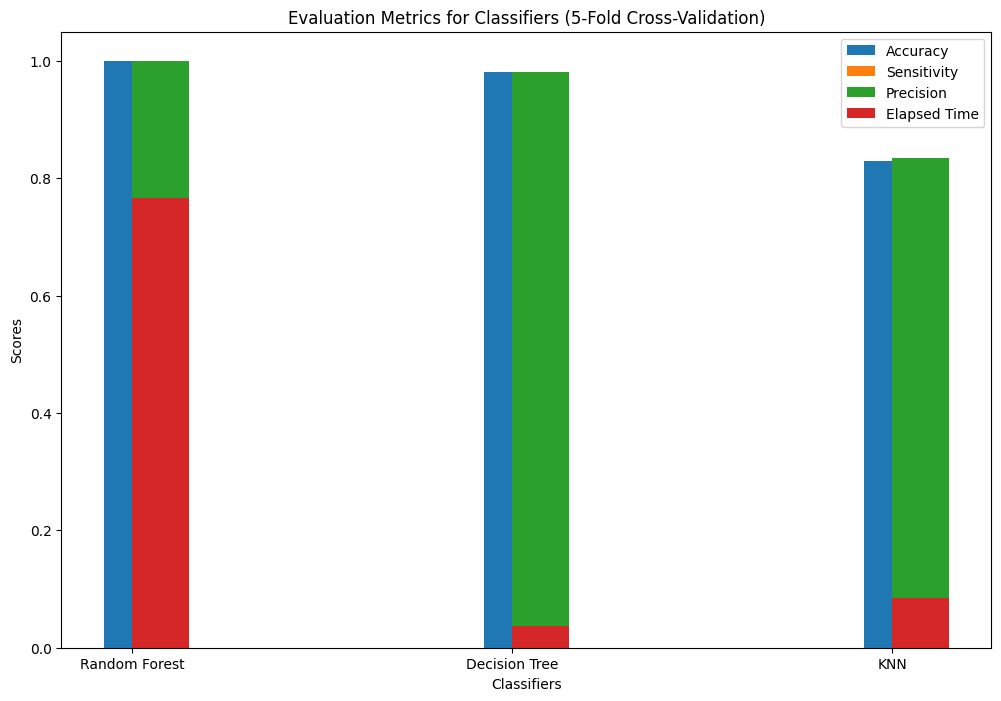

In [ ]:
classifiers = ['Random Forest', 'Decision Tree', 'KNN']
accuracy_scores = []
sensitivity_scores = []

precision_scores = []
elapsed_times = []

# 5-Fold
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

# evaluation metrics for 5-fold
accuracy_5fold = []
sensitivity_5fold = []

precision_5fold = []
elapsed_times_5fold = []

# Random Forest Classifier (5-fold)
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y, cv=kf5)
elapsed_time_rf = time.time() - start_time

rf_accuracy_5fold = accuracy_score(y, rf_predictions)
rf_recall_5fold = recall_score(y, rf_predictions, average='weighted')

rf_precision_5fold = precision_score(y, rf_predictions, average='weighted')
conf_matrix_rf = confusion_matrix(y, rf_predictions)

accuracy_5fold.append(rf_accuracy_5fold)
sensitivity_5fold.append(rf_recall_5fold)
precision_5fold.append(rf_precision_5fold)
elapsed_times_5fold.append(elapsed_time_rf)

print("Random Forest 5-Fold Cross-Validation Results:")
print("Random Forest Accuracy:", rf_accuracy_5fold)
print("Random Forest Sensitivity:", rf_recall_5fold)

print("Random Forest Precision:", rf_precision_5fold)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Elapsed Time:", elapsed_time_rf)

# Decision Tree Classifier (5-fold)
start_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_predictions = cross_val_predict(dt_classifier, X, y, cv=kf5)
elapsed_time_dt = time.time() - start_time

dt_accuracy_5fold = accuracy_score(y, dt_predictions)
dt_recall_5fold = recall_score(y, dt_predictions, average='weighted')

dt_precision_5fold = precision_score(y, dt_predictions, average='weighted')
conf_matrix_dt = confusion_matrix(y, dt_predictions)

accuracy_5fold.append(dt_accuracy_5fold)
sensitivity_5fold.append(dt_recall_5fold)

precision_5fold.append(dt_precision_5fold)
elapsed_times_5fold.append(elapsed_time_dt)

print("Decision Tree 5-Fold Cross-Validation Results:")
print("Decision Tree Accuracy:", dt_accuracy_5fold)
print("Decision Tree Sensitivity:", dt_recall_5fold)

print("Decision Tree Precision:", dt_precision_5fold)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)
print("Decision Tree Elapsed Time:", elapsed_time_dt)

# KNN Classifier (5-fold)
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_predictions = cross_val_predict(knn_classifier, X, y, cv=kf5)
elapsed_time_knn = time.time() - start_time

knn_accuracy_5fold = accuracy_score(y, knn_predictions)
knn_recall_5fold = recall_score(y, knn_predictions, average='weighted')
knn_precision_5fold = precision_score(y, knn_predictions, average='weighted')
conf_matrix_knn = confusion_matrix(y, knn_predictions)

accuracy_5fold.append(knn_accuracy_5fold)
sensitivity_5fold.append(knn_recall_5fold)
precision_5fold.append(knn_precision_5fold)
elapsed_times_5fold.append(elapsed_time_knn)

print("KNN 5-Fold Cross-Validation Results:")
print("KNN Accuracy:", knn_accuracy_5fold)
print("KNN Sensitivity:", knn_recall_5fold)
print("KNN Precision:", knn_precision_5fold)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print("KNN Elapsed Time:", elapsed_time_knn)

# graph for 5 fold
x = range(len(classifiers))

plt.figure(figsize=(12, 8))

plt.bar(x, accuracy_5fold, width=0.15, label='Accuracy', align='center')
plt.bar(x, sensitivity_5fold, width=0.15, label='Sensitivity', align='edge')
plt.bar(x, precision_5fold, width=0.15, label='Precision', align='edge')
plt.bar(x, elapsed_times_5fold, width=0.15, label='Elapsed Time', align='edge')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.xticks(x, classifiers)
plt.legend()
plt.title('Evaluation Metrics for Classifiers (5-Fold Cross-Validation)')
plt.show()

Random Forest 10-Fold Cross-Validation Results:
Random Forest Accuracy: 1.0
Random Forest Sensitivity: 1.0
Random Forest Precision: 1.0
Random Forest Confusion Matrix:
[[115   0]
 [  0  43]]
Random Forest Elapsed Time: 5.1901185512542725
Decision Tree 10-Fold Cross-Validation Results:
Decision Tree Accuracy: 0.9810126582278481
Decision Tree Sensitivity: 0.9810126582278481
Decision Tree Precision: 0.9814953872559538
Decision Tree Confusion Matrix:
[[115   0]
 [  3  40]]
Decision Tree Elapsed Time: 0.09942102432250977
KNN 10-Fold Cross-Validation Results:
KNN Accuracy: 0.8354430379746836
KNN Sensitivity: 0.8354430379746836
KNN Precision: 0.8547682839737536
KNN Confusion Matrix:
[[114   1]
 [ 25  18]]
KNN Elapsed Time: 0.43821215629577637


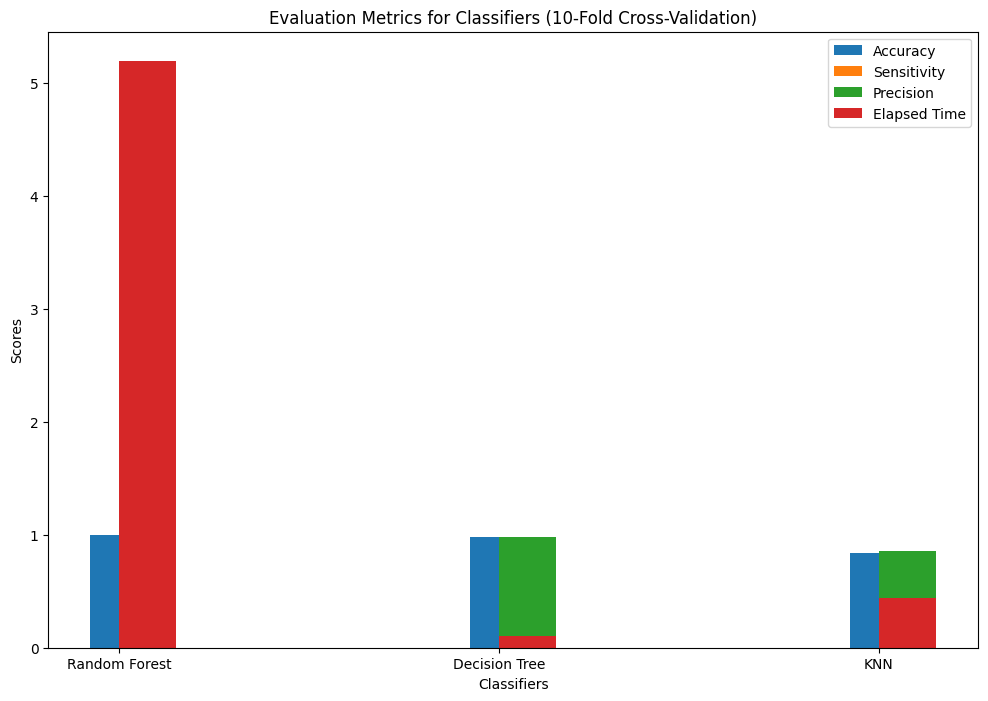

In [ ]:
classifiers = ['Random Forest', 'Decision Tree', 'KNN']
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
precision_scores = []
elapsed_times = []

# 10-Fold
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

# evaluation metrics
accuracy_10fold = []
sensitivity_10fold = []
precision_10fold = []
elapsed_times_10fold = []

# Random Forest  (10-fold)
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y, cv=kf10)
elapsed_time_rf = time.time() - start_time

rf_accuracy_10fold = accuracy_score(y, rf_predictions)
rf_recall_10fold = recall_score(y, rf_predictions, average='weighted')
rf_precision_10fold = precision_score(y, rf_predictions, average='weighted')
conf_matrix_rf = confusion_matrix(y, rf_predictions)

accuracy_10fold.append(rf_accuracy_10fold)
sensitivity_10fold.append(rf_recall_10fold)
precision_10fold.append(rf_precision_10fold)
elapsed_times_10fold.append(elapsed_time_rf)

print("Random Forest 10-Fold Cross-Validation Results:")
print("Random Forest Accuracy:", rf_accuracy_10fold)
print("Random Forest Sensitivity:", rf_recall_10fold)
print("Random Forest Precision:", rf_precision_10fold)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Elapsed Time:", elapsed_time_rf)

# Decision Tree  (10-fold)
start_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_predictions = cross_val_predict(dt_classifier, X, y, cv=kf10)
elapsed_time_dt = time.time() - start_time

dt_accuracy_10fold = accuracy_score(y, dt_predictions)
dt_recall_10fold = recall_score(y, dt_predictions, average='weighted')
dt_precision_10fold = precision_score(y, dt_predictions, average='weighted')
conf_matrix_dt = confusion_matrix(y, dt_predictions)

accuracy_10fold.append(dt_accuracy_10fold)
sensitivity_10fold.append(dt_recall_10fold)
precision_10fold.append(dt_precision_10fold)
elapsed_times_10fold.append(elapsed_time_dt)

print("Decision Tree 10-Fold Cross-Validation Results:")
print("Decision Tree Accuracy:", dt_accuracy_10fold)
print("Decision Tree Sensitivity:", dt_recall_10fold)
print("Decision Tree Precision:", dt_precision_10fold)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)
print("Decision Tree Elapsed Time:", elapsed_time_dt)

# KNN (10-fold)
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_predictions = cross_val_predict(knn_classifier, X, y, cv=kf10)
elapsed_time_knn = time.time() - start_time

knn_accuracy_10fold = accuracy_score(y, knn_predictions)
knn_recall_10fold = recall_score(y, knn_predictions, average='weighted')
knn_precision_10fold = precision_score(y, knn_predictions, average='weighted')
conf_matrix_knn = confusion_matrix(y, knn_predictions)

accuracy_10fold.append(knn_accuracy_10fold)
sensitivity_10fold.append(knn_recall_10fold)
precision_10fold.append(knn_precision_10fold)
elapsed_times_10fold.append(elapsed_time_knn)

print("KNN 10-Fold Cross-Validation Results:")
print("KNN Accuracy:", knn_accuracy_10fold)
print("KNN Sensitivity:", knn_recall_10fold)
print("KNN Precision:", knn_precision_10fold)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print("KNN Elapsed Time:", elapsed_time_knn)

# Graph
x = range(len(classifiers))

plt.figure(figsize=(12, 8))

plt.bar(x, accuracy_10fold, width=0.15, label='Accuracy', align='center')
plt.bar(x, sensitivity_10fold, width=0.15, label='Sensitivity', align='edge')
plt.bar(x, precision_10fold, width=0.15, label='Precision', align='edge')
plt.bar(x, elapsed_times_10fold, width=0.15, label='Elapsed Time', align='edge')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.xticks(x, classifiers)
plt.legend()
plt.title('Evaluation Metrics for Classifiers (10-Fold Cross-Validation)')
plt.show()